# Тесты, AKФ 


Что проверяем:
 - периодичность


Куда смотреть на тесты https://runebook.dev/ru/docs/statsmodels/stats

Ряды: "Потребление энергии" и "Цена нефти BRENT". 


Первый пример отличается от второго регулярным характером явления. Будем использовать предобработанные версии этих рядов с признаками из календаря.   




## Потребление энергии

Временной ряд связан с измерением потребления энергии в отдельных регионах США в период 2002 по 2018 г. (PJM Hourly Energy Consumption Data
https://www.kaggle.com/robikscube/hourly-energy-consumption). Содержит часовые измерения и после обработки добавлены метки по времени для календаря.


In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error

import os


Загрузим файл с данными и посмотрим на таблицу их организующую.

In [141]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [142]:
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


Описательная статистика практически не изменилась после обработки пропусков, сортировки и удаления дублей.

In [143]:
data.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000
mean,32079.773047,2009.801340,6.435979,15.722681,2.481241,180.459835,26.218643,2.999168,11.501101,0.027233,0.027075,0.027240
std,6464.167501,4.791885,3.438982,8.801258,1.114448,105.138073,15.019836,1.999572,6.921927,0.162763,0.162303,0.162783
min,14544.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27573.000000,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,31421.000000,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,35648.750000,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,62009.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


Общий вид изменения ключевого свойства ряда приведен на рис.1.

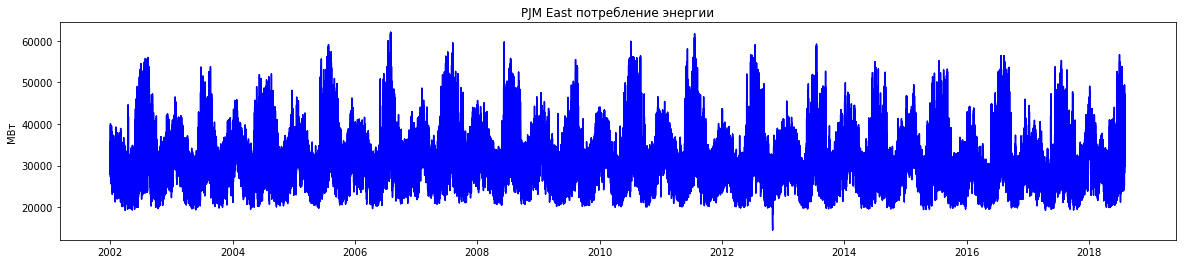

In [144]:

plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

Рис.1. Потребление энергии

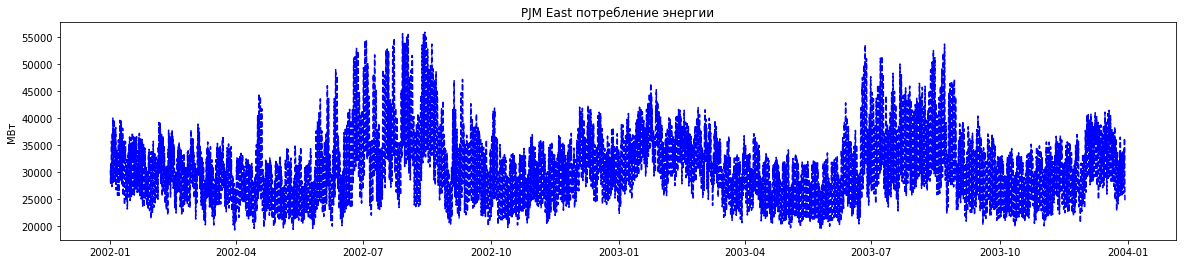

In [145]:
date_time =data['PJME_MW']
date_time.index = pd.date_range(data.index[0], periods=data.index.shape[0], freq="H")
plt.figure(figsize =(20,4))
plt.plot( date_time.index[:24*7*104], date_time.values[:24*7*104], '--b' )

plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

### Производная ряда:

первые разности:

In [146]:
d_data = data['PJME_MW'].values[1:]-data['PJME_MW'].values[:-1] # можно так - массив
#d_data = data['PJME_MW'].diff(1)                   # или так - серия

In [147]:
d_data

array([-1128.,  -908.,  -458., ..., -1704., -3052., -3014.])

In [150]:
data.iloc[:-1000,:].head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


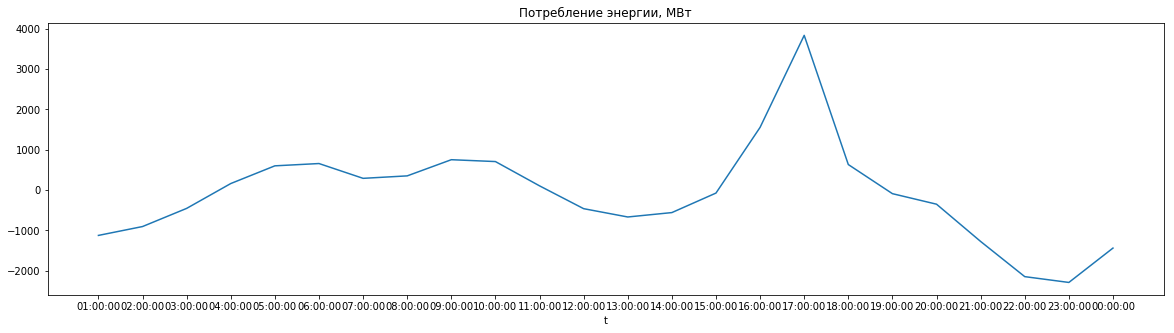

In [151]:
plt.figure(figsize=(20,5))

plt.plot(data.iloc[:24,0],d_data[:24])
plt.xlabel('t')
plt.title('Потребление энергии, МВт')

plt.show()

In [152]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


Понижаем сложность задачи и перестраиваем ряд(Потребление энергии) на месячный 

In [153]:
data_m = data.resample('M').mean()

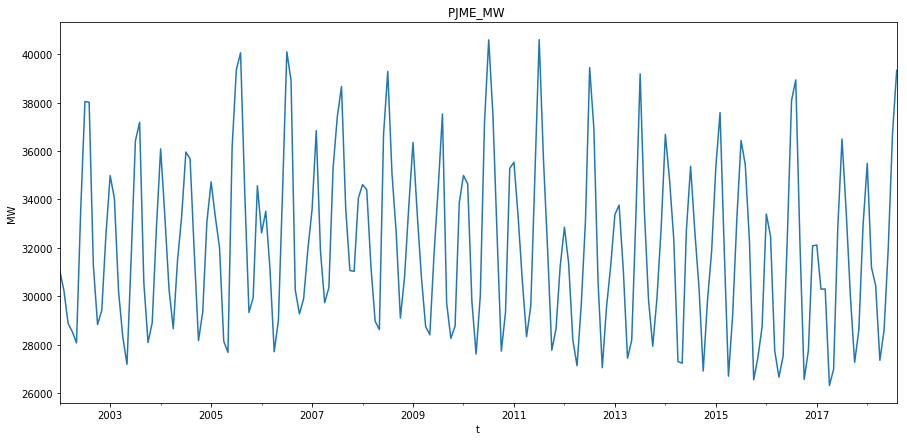

In [154]:

_ = data_m['PJME_MW'].plot( style='-', figsize=( 15, 7 ), title='PJME_MW ')
plt.ylabel('MW')
plt.xlabel('t')
plt.show()

Новые графики потеряли выбросы: видно цикличность потребления энергии. 


# Автокорреляция


In [155]:
data_d = data.copy().resample('D').mean()
data_m = data.resample('M').mean()


На Исходных часовых данных : цикл 24 тика

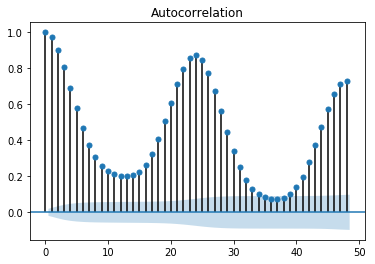

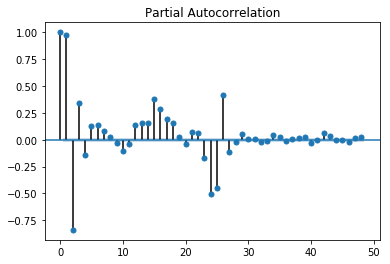

In [156]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(data['PJME_MW'].values[:10000], lags=24*2)
plt.show()

#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(data['PJME_MW'].values[:10000], lags=24*2)
plt.show()


На Исходных дневном ресемплинге ряда : цикл 7 тиков

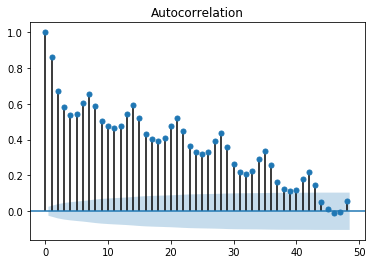

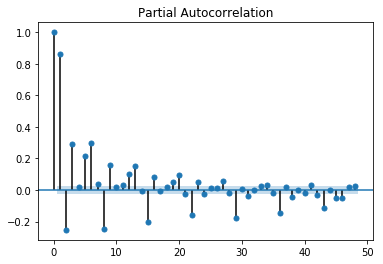

In [157]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(data_d['PJME_MW'].values[:10000], lags=24*2)
plt.show()

#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(data_d['PJME_MW'].values[:10000], lags=24*2)
plt.show()

На месячном ресемплинге ряда : цикл 12 (и 6 ) тиков

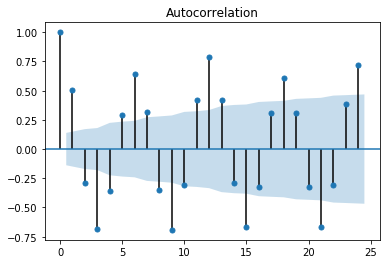

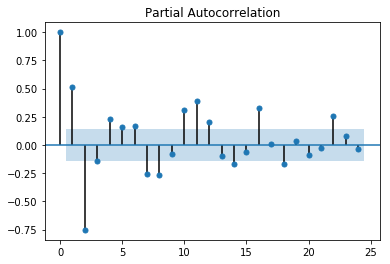

In [158]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values[:10000], lags=12*2)
plt.show()

#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values[:10000], lags=12*2)
plt.show()

Смотрим на месячные данные

In [159]:
data_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


### Добавляем признаков

Признаки прошлые значения ряда

In [160]:

# добавили историю на глубину 10 измерения от текущего (р=10)\\
p = 10    
for i in range(1,p):    
    data_m['t'+str(i)] = 0.0
    data_m.iloc[i:,-1]=data_m.iloc[:-i,0].values

data_m.fillna(0)
data_m.tail()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,...,is_next_holiday,t1,t2,t3,t4,t5,t6,t7,t8,t9
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-30,27353.266667,2018.0,4.0,15.500000,2.0,105.500000,15.500000,3.000000,11.500000,0.000000,...,0.000000,30438.549125,31193.104167,35490.663978,32924.768817,28618.505540,27268.169355,29974.130556,33460.411290,36494.322581
2018-05-31,28599.951613,2018.0,5.0,16.000000,2.0,136.000000,19.870968,2.903226,11.500000,0.032258,...,0.032258,27353.266667,30438.549125,31193.104167,35490.663978,32924.768817,28618.505540,27268.169355,29974.130556,33460.411290
2018-06-30,32014.469444,2018.0,6.0,15.500000,2.0,166.500000,24.200000,3.100000,11.500000,0.000000,...,0.000000,28599.951613,27353.266667,30438.549125,31193.104167,35490.663978,32924.768817,28618.505540,27268.169355,29974.130556
2018-07-31,36696.737903,2018.0,7.0,16.000000,3.0,197.000000,28.580645,2.935484,11.500000,0.032258,...,0.032258,32014.469444,28599.951613,27353.266667,30438.549125,31193.104167,35490.663978,32924.768817,28618.505540,27268.169355
2018-08-31,39331.795918,2018.0,8.0,1.530612,3.0,213.530612,31.000000,2.530612,11.265306,0.000000,...,0.000000,36696.737903,32014.469444,28599.951613,27353.266667,30438.549125,31193.104167,35490.663978,32924.768817,28618.505540


In [161]:
data_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,...,is_next_holiday,t1,t2,t3,t4,t5,t6,t7,t8,t9
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,...,0.064603,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,...,0.035714,31075.399731,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,...,0.000000,30239.166667,31075.399731,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,...,0.000000,28875.256720,30239.166667,31075.399731,0.000000,0.0,0.0,0.0,0.0,0.0
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,...,0.032258,28534.731572,28875.256720,30239.166667,31075.399731,0.0,0.0,0.0,0.0,0.0


Укоротим данные на бракованные строки

In [162]:
data_m = data_m.iloc[p:,:]

## Построение модели предсказания значения ряда на 1 шаг вперед

Строим разделение данных на тренировочные и тестовые

In [163]:
# интервал будущего для предсказания (пока 1 шаг вперед)
h = 1

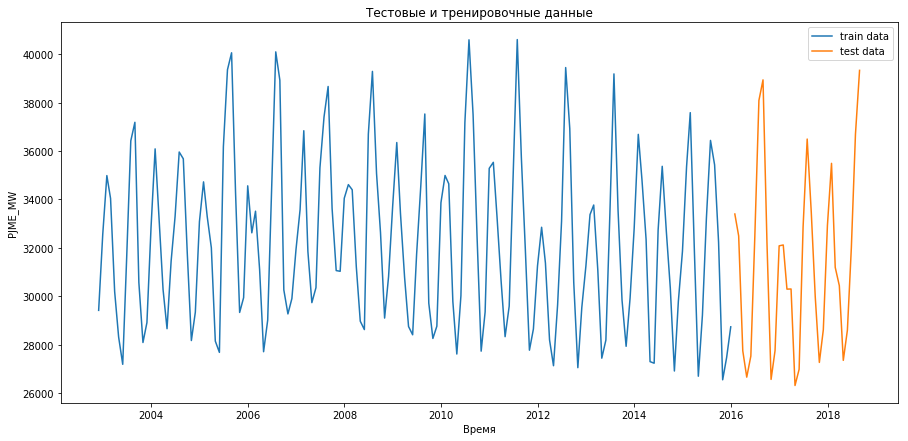

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

train_b, test_b = split_data_b( data_m, '01-01-2016')

X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[data_m.columns[0]].values[h:]
X_test_b = test_b.iloc[:-h,:]
y_test_b = test_b[data_m.columns[0]].values[h:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('PJME_MW')
plt.plot(train_b.index.get_level_values('Date'),train_b[data_m.columns[0]], label='train data' )
plt.plot(test_b.index.get_level_values('Date'),test_b[data_m.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

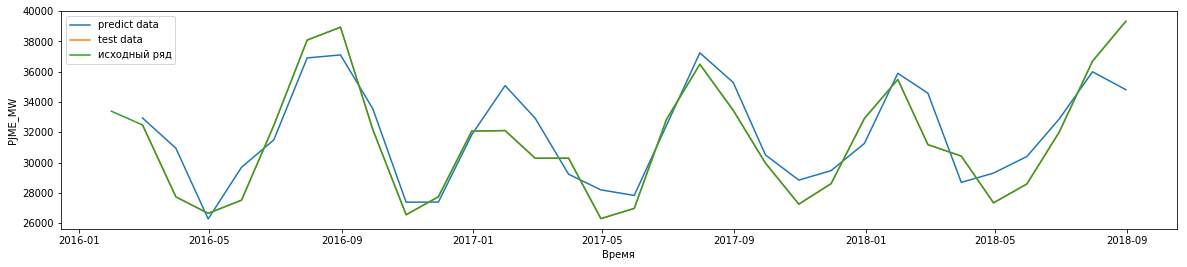

ошибка градиентного бустинга :   4.705065555722212 %


In [165]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Предсказание
model_gb = LinearRegression()
model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('PJME_MW')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predict data' )
plt.plot(test_b.index[h:],y_test_b, label='test data')
plt.plot(data_m.loc['01-01-2016':].index, data_m.loc['01-01-2016':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

Интересные ссылки:
1. Пакет стат.моделирования https://www.statsmodels.org/stable/
2. Пакет для прогнозирования во временных рядах от FaceBook https://facebook.github.io/prophet/docs/quick_start.html
3. Шпаргалка основных терминов и идей http://www.filippov12.ru/files/Blitz_2.pdf
4. Модель Хольта-Винтерса https://habr.com/ru/company/ods/blog/327242/
5. Оценка ошибок https://basegroup.ru/community/bank/compare-model
6. Сравнительно простой учебник http://statsoft.ru/home/textbook/modules/sttimser.html#spectrum

